<a href="https://colab.research.google.com/github/sneha-m1907/Heart-disease-detction-system/blob/main/comparison_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'Heart_Disease_Prediction.csv', 'sample_data']


In [ ]:
# 1.Begin by loading and preprocessing the dataset. You can use libraries like Pandas and NumPy for this purpose.                                           import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd


# Load the Heart Disease dataset
data = pd.read_csv('Heart_Disease_Prediction.csv')
label_encoder = LabelEncoder()
data['Heart Disease'] = label_encoder.fit_transform(data['Heart Disease'])

# Split the data into features (X) and labels (y)
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']


# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


SVM

In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, y_train)

Y_pred_svm = sv.predict(X_test)
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")
report = classification_report(y_test, Y_pred_svm)
print(report)

The accuracy score achieved using Linear SVM is: 88.89 %
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.89      0.81      0.85        21

    accuracy                           0.89        54
   macro avg       0.89      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54



K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)
score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")
report = classification_report(y_test, Y_pred_knn)
print(report)

The accuracy score achieved using KNN is: 81.48 %
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        33
           1       0.82      0.67      0.74        21

    accuracy                           0.81        54
   macro avg       0.82      0.79      0.80        54
weighted avg       0.82      0.81      0.81        54



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
Y_pred_dt = dt.predict(X_test)
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")
report = classification_report(y_test, Y_pred_dt)
print(report)

The accuracy score achieved using Decision Tree is: 75.93 %
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        33
           1       0.67      0.76      0.71        21

    accuracy                           0.76        54
   macro avg       0.75      0.76      0.75        54
weighted avg       0.77      0.76      0.76        54



XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

Y_pred_xgb = xgb_model.predict(X_test)

score_xgb = round(accuracy_score(Y_pred_xgb,y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")
report = classification_report(y_test, Y_pred_xgb)
print(report)

The accuracy score achieved using XGBoost is: 81.48 %
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.79      0.71      0.75        21

    accuracy                           0.81        54
   macro avg       0.81      0.80      0.80        54
weighted avg       0.81      0.81      0.81        54



Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=20)
Y_pred_nn = model.predict(X_test)

rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded
report = classification_report(y_test, Y_pred_nn)
score_nn = round(accuracy_score(Y_pred_nn,y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")
print(report)

Epoch 1/20
7/7 [==============================] - 1s 3ms/step - loss: 0.7353 - accuracy: 0.6204
Epoch 2/20
7/7 [==============================] - 0s 3ms/step - loss: 0.7042 - accuracy: 0.6389
Epoch 3/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6773 - accuracy: 0.6528
Epoch 4/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6509 - accuracy: 0.6759
Epoch 5/20
7/7 [==============================] - 0s 4ms/step - loss: 0.6298 - accuracy: 0.6898
Epoch 6/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6099 - accuracy: 0.6944
Epoch 7/20
7/7 [==============================] - 0s 3ms/step - loss: 0.5922 - accuracy: 0.6991
Epoch 8/20
7/7 [==============================] - 0s 3ms/step - loss: 0.5752 - accuracy: 0.7083
Epoch 9/20
7/7 [==============================] - 0s 3ms/step - loss: 0.5610 - accuracy: 0.7176
Epoch 10/20
7/7 [==============================] - 0s 3ms/step - loss: 0.5470 - accuracy: 0.7222
Epoch 11/20
7/7 [======================

Federated Learning

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

def create_model(input_shape=(13,)):  # Adjust the default input shape
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))  # Use the provided input shape
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model
# Assuming that 'client_models' is a list of models trained by clients
client_models = [create_model() for _ in range(10)]


def aggregate_models(models):
    total_layers = len(models[0].layers)
    weights = [[] for _ in range(total_layers)]

    for model in models:
        for i, layer in enumerate(model.layers):
            layer_weights = layer.get_weights()

            for j, weight_array in enumerate(layer_weights):
                if len(weights[i]) <= j:
                    weights[i].append([])
                weights[i][j].append(weight_array)

    average_weights = [
        [np.mean(np.array(weight_list), axis=0) for weight_list in layer_weights]
        for layer_weights in weights
    ]

    for i, (layer, layer_weights) in enumerate(zip(models[0].layers, average_weights)):
        layer.set_weights(layer_weights)

    return models[0]
# # Assuming that 'clients_models' is a list of models trained by clients
global_model = aggregate_models(client_models)
def hawk_optimization(current_weights, global_weights, learning_rate, alpha=0.5, beta=0.5):
    # """
    # Hawk-inspired optimization function.

    # Parameters:
    # - current_weights: Current weights of the layer in the model.
    # - global_weights: Global weights for aggregation.
    # - learning_rate: Learning rate for weight updates.
    # - alpha: Hawk-inspired parameter (customize based on problem).
    # - beta: Hawk-inspired parameter (customize based on problem).

    # Returns:
    # - updated_weights: Updated weights after Hawk-inspired optimization.
    # """
    epsilon = np.random.rand(*current_weights.shape)  # Random noise for exploration
    exploration_term = alpha * epsilon * (current_weights - global_weights)
    exploitation_term = beta * (current_weights - global_weights)

    # Hawk-inspired optimization update rule
    updated_weights = current_weights - learning_rate * (exploration_term + exploitation_term)

    return updated_weights
def train_model_with_hawk_optimization(model, X, y, global_model, epochs=5, batch_size=32, learning_rate=0.01):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    training_accuracies = []  # To store training accuracies for each epoch

    for epoch in range(epochs):
        for layer_index, (layer, global_layer) in enumerate(zip(model.layers, global_model.layers)):
            current_weights = layer.get_weights()
            global_weights = global_layer.get_weights()

            # Apply Hawk-inspired optimization to update the layer weights
            updated_weights = []

            for cw, gw in zip(current_weights, global_weights):
                if cw is not None and gw is not None:
                    updated_weight = hawk_optimization(cw, gw, learning_rate)
                    updated_weights.append(updated_weight)
                else:
                    updated_weights.append(None)

            # Set the updated weights to the layer
            layer.set_weights(updated_weights)

        # Fit the model with the updated weights
        history = model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0)

        # Track training accuracy for each epoch
        training_accuracies.append(history.history['accuracy'][0])

    return training_accuracies
def evaluate_model(model, X, y):
    loss, accuracy = model.evaluate(X, y)
    return loss, accuracy
# Train models using Hawk-inspired optimization
training_accuracies = []
for model in client_models:
    acc = train_model_with_hawk_optimization(model, X_train, y_train, global_model)
    training_accuracies.append(acc)


# Evaluate the federated learning model
loss, accuracy = evaluate_model(global_model, X_test, y_test)
accuracy_fl=round(accuracy*100,2)
print(f"Test accuracy: {accuracy_fl }%")
report = classification_report(y_test, Y_pred_xgb)
print(report)



2/2 [==============================] - 1s 15ms/step - loss: 1.4346 - accuracy: 0.8704
Test accuracy: 87.04%
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.79      0.71      0.75        21

    accuracy                           0.81        54
   macro avg       0.81      0.80      0.80        54
weighted avg       0.81      0.81      0.81        54



In [ ]:
scores = [score_svm,score_knn,score_dt,score_xgb,score_nn,accuracy_fl]
algorithms = ["Support Vector Machine","K-Nearest Neighbors","Decision Tree","XGBoost","Neural Network","Federated Learning"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Support Vector Machine is: 88.89 %
The accuracy score achieved using K-Nearest Neighbors is: 81.48 %
The accuracy score achieved using Decision Tree is: 75.93 %
The accuracy score achieved using XGBoost is: 81.48 %
The accuracy score achieved using Neural Network is: 74.07 %
The accuracy score achieved using Federated Learning is: 87.04 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

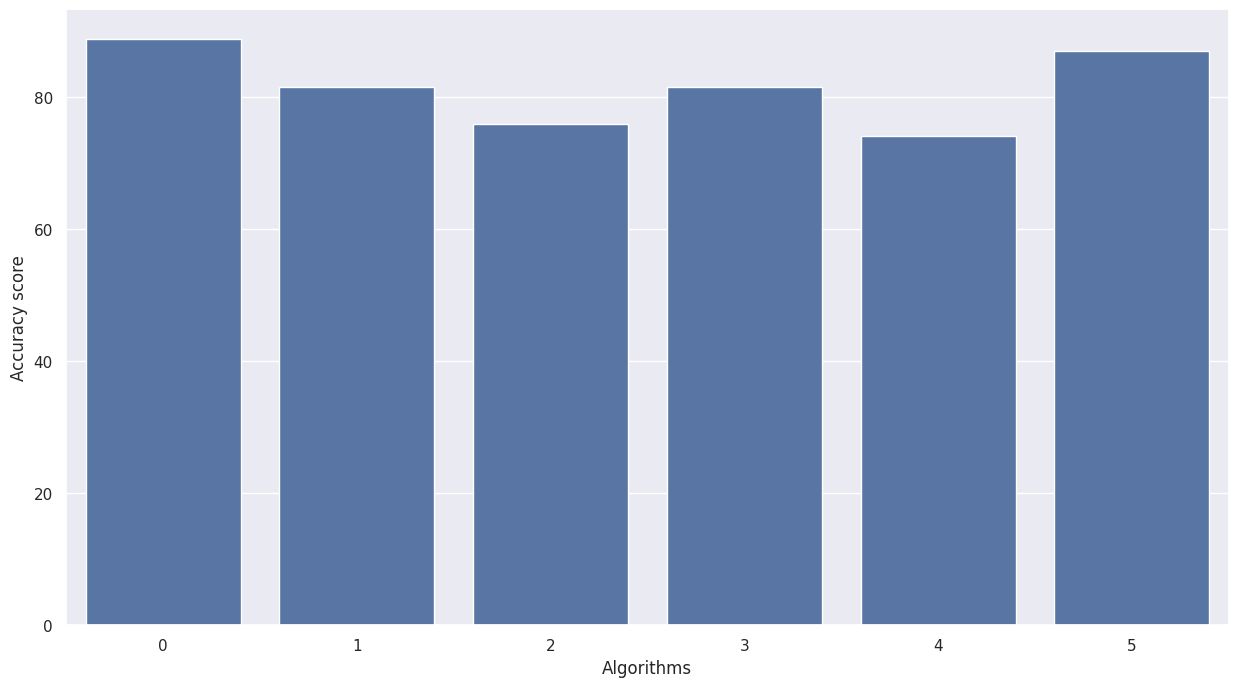

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(scores)


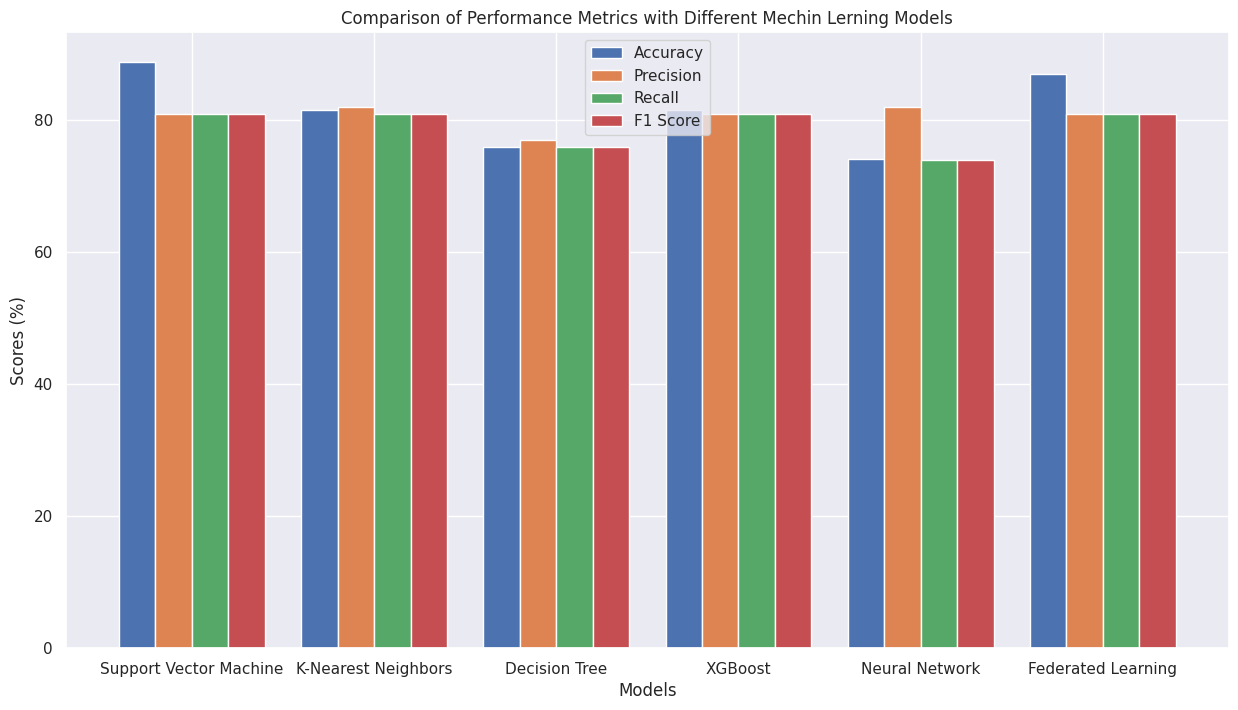

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)
models = ["Support Vector Machine","K-Nearest Neighbors","Decision Tree","XGBoost","Neural Network","Federated Learning"]
accuracy =[score_svm,score_knn,score_dt,score_xgb,score_nn,accuracy_fl]
precision = [81,82,77,81,82,81]
recall = [81,81,76,81,74,81]
f1_score = [81,81,76,81,74,81]

# Plotting
bar_width = 0.2
index = np.arange(len(models))

fig, ax = plt.subplots()

bar1 = ax.bar(index, accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(index + bar_width, precision, bar_width, label='Precision')
bar3 = ax.bar(index + 2 * bar_width, recall, bar_width, label='Recall')
bar4 = ax.bar(index + 3 * bar_width, f1_score, bar_width, label='F1 Score')

# Customize the plot
ax.set_xlabel('Models')
ax.set_ylabel('Scores (%)')
ax.set_title('Comparison of Performance Metrics with Different Mechin Lerning Models')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.show()